## Querying Multiple Tables

In [2]:
import mysql.connector

cn=mysql.connector.connect(host='localhost',user='root',password='Vibha.7522')
cursor=cn.cursor()

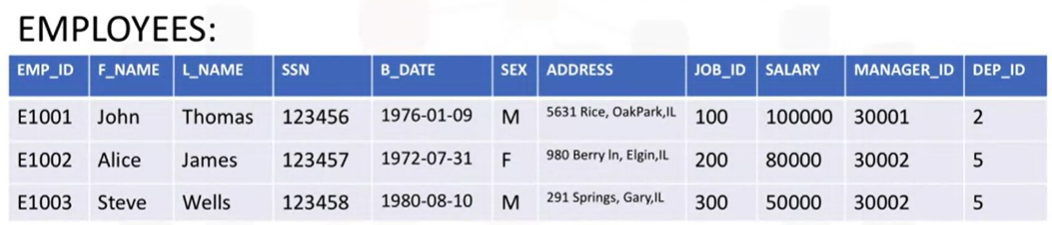
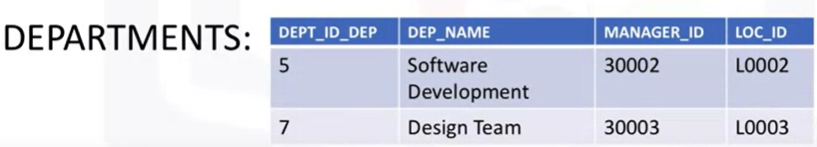

#### Assessing Multiple Tables
#### With SubQueries

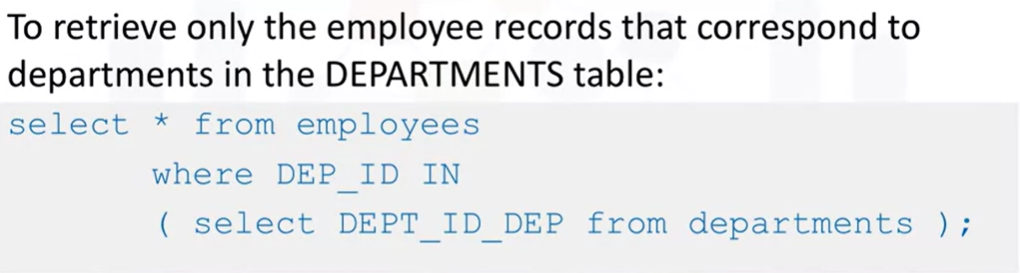
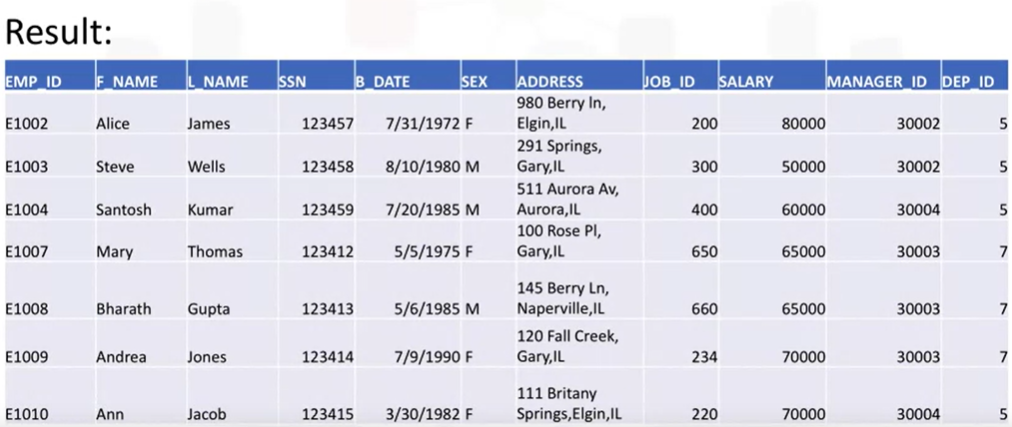

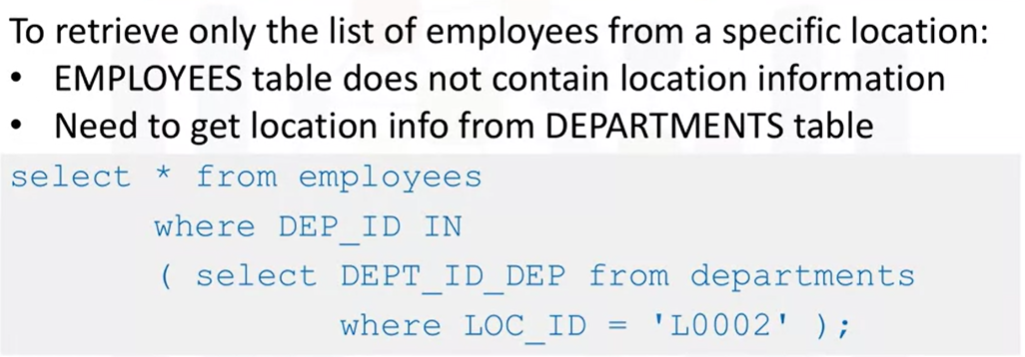
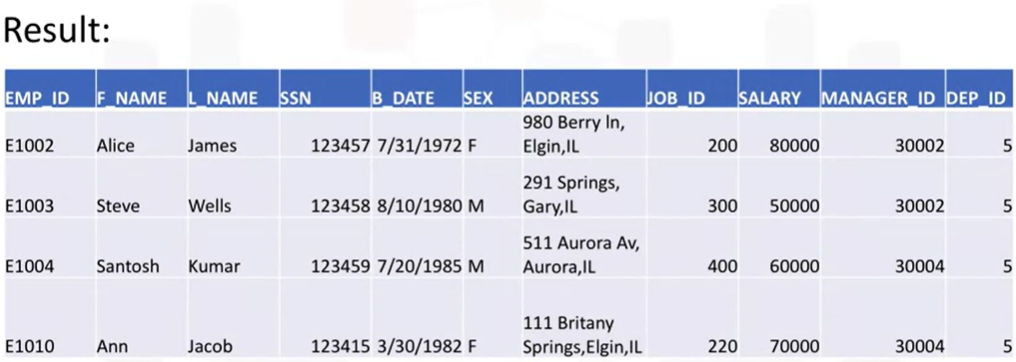

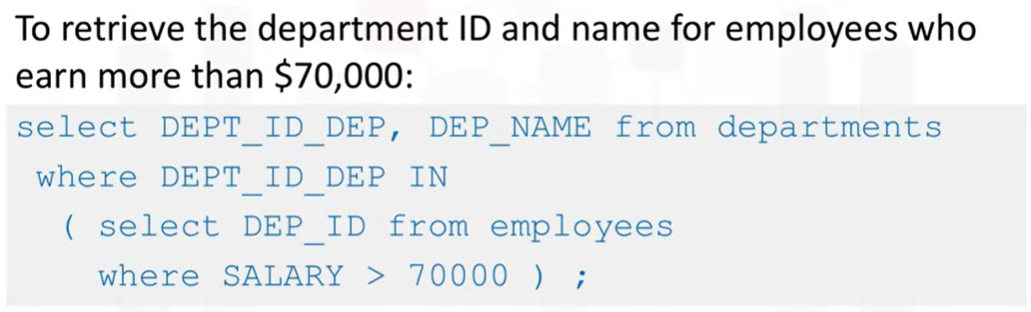
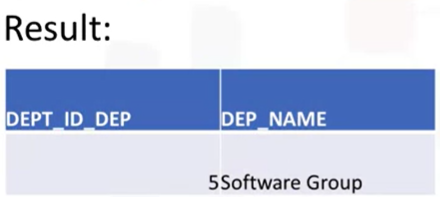

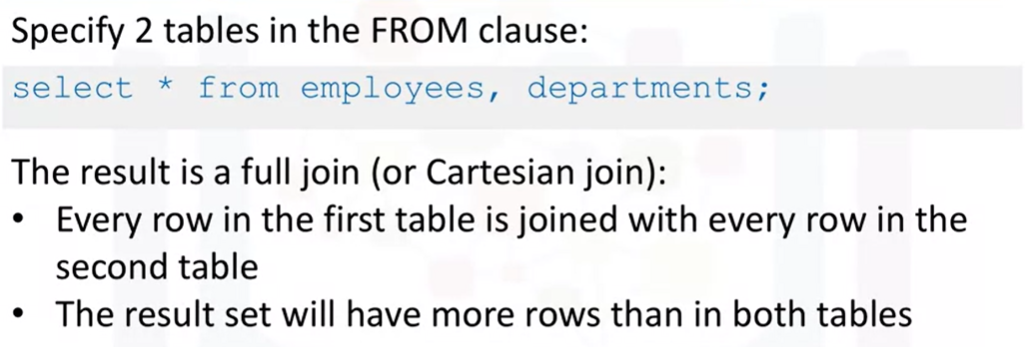
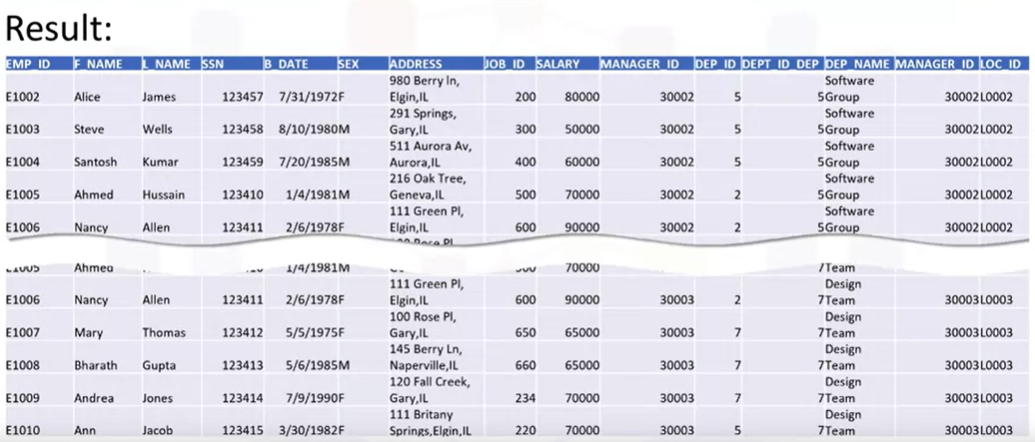

### Accessing multiple tables with implicit join 

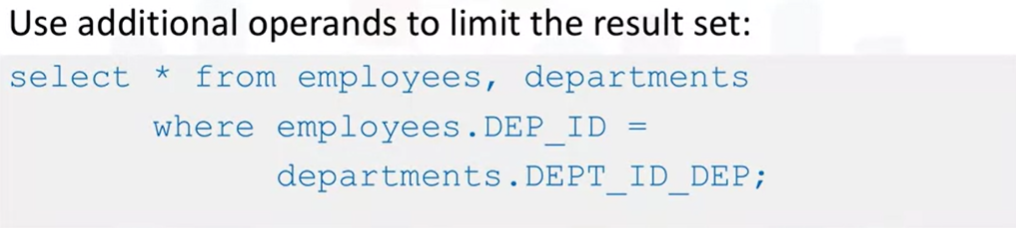
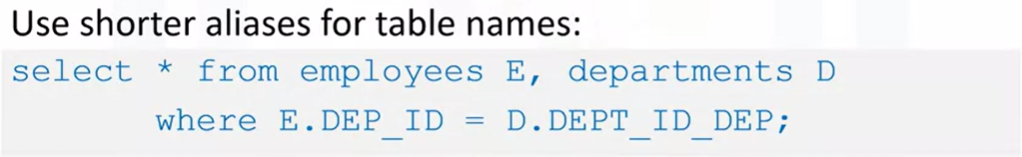
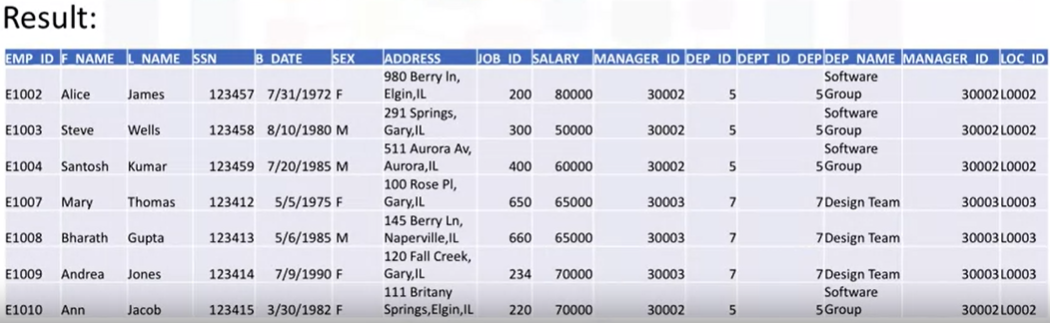

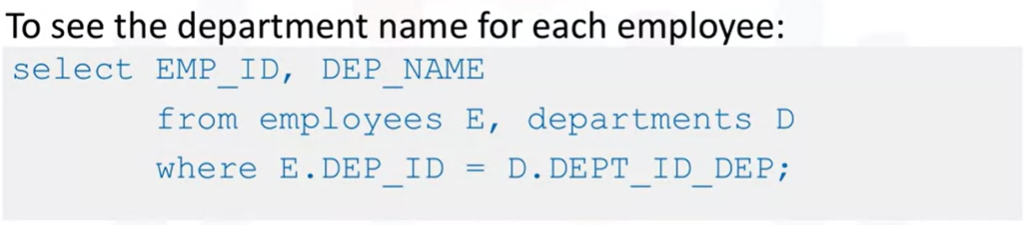
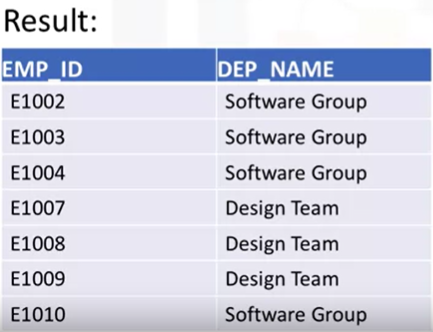

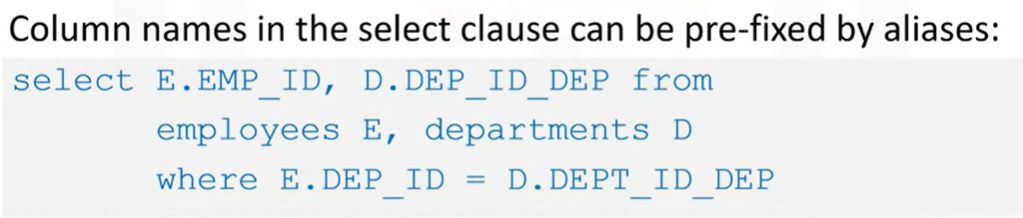
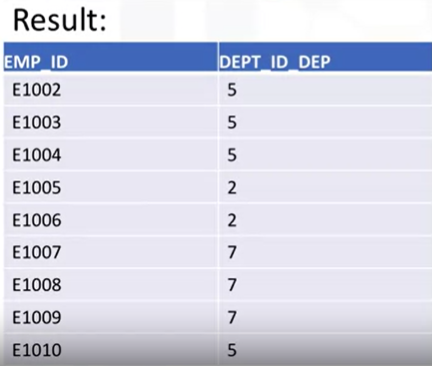

## Hands-on Lab: Working with Multiple Tables in MySQL

After completing this lab, you will be able to:

1. Write SQL queries that access more than one table
2. Compose queries that access multiple tables using a nested statement in the WHERE clause
3. Build queries with multiple tables in the FROM clause
4. Write Implicit Join queries with join criteria specified in the WHERE clause
5. Specify aliases for table names and qualify column names with table aliases

In this lab, you will complete SQL practice problems that will provide hands-on experience with SQL queries that access multiple tables. You will be:

1. Accessing Multiple Tables with Sub-Queries
2. Accessing Multiple Tables with Implicit Joins

## Accessing multiple tables with sub-queries
Let us see some examples of queries requiring multiple table access using sub-queries.

1. Retrieve only the EMPLOYEES records corresponding to jobs in the JOBS table.

For such a question, you can implement the sub-query in the WHERE clause, such that the overlapping column of JOD ID can identify the required entries.

In [3]:
cursor.execute("use HR_database")

In [4]:
cursor.execute("SELECT * FROM EMPLOYEES WHERE JOB_ID IN (SELECT JOB_IDENT FROM JOBS)")
cursor.fetchall()

[('E1001',
  'John',
  'Thomas',
  '123456',
  datetime.date(1976, 9, 1),
  'M',
  '5631 Rice, OakPark,IL',
  '100',
  Decimal('100000.00'),
  '30001',
  '2'),
 ('E1005',
  'Ahmed',
  'Hussain',
  '123410',
  datetime.date(1981, 4, 1),
  'M',
  '216 Oak Tree, Geneva,IL',
  '500',
  Decimal('70000.00'),
  '30001',
  '2'),
 ('E1006',
  'Nancy',
  'Allen',
  '123411',
  datetime.date(1978, 6, 2),
  'F',
  '111 Green Pl, Elgin,IL',
  '600',
  Decimal('90000.00'),
  '30001',
  '2'),
 ('E1007',
  'Mary',
  'Thomas',
  '123412',
  datetime.date(1975, 5, 5),
  'F',
  '100 Rose Pl, Gary,IL',
  '650',
  Decimal('65000.00'),
  '30003',
  '7'),
 ('E1008',
  'Bharath',
  'Gupta',
  '123413',
  datetime.date(1985, 6, 5),
  'M',
  '145 Berry Ln, Naperville,IL',
  '660',
  Decimal('65000.00'),
  '30003',
  '7'),
 ('E1009',
  'Andrea',
  'Jones',
  '123414',
  datetime.date(1990, 9, 7),
  'F',
  '120 Fall Creek, Gary,IL',
  '234',
  Decimal('70000.00'),
  '30003',
  '7'),
 ('E1010',
  'Ann',
  'Jacob',

2. Retrieve JOB information for employees earning over 70,000.

For this example, retrieve the details from the JOBS table, which has common IDs with those available in the EMPLOYEES table, provided the salary in the EMPLOYEES table is greater than $70,000. You can write the query as:

In [5]:
cursor.execute("SELECT JOB_TITLE, MIN_SALARY, MAX_SALARY, JOB_IDENT FROM JOBS WHERE JOB_IDENT IN (select JOB_ID from EMPLOYEES where SALARY > 70000 )")
cursor.fetchall()

[('Sr. Architect', Decimal('60000.00'), Decimal('100000.00'), '100'),
 ('Lead Architect', Decimal('70000.00'), Decimal('100000.00'), '600')]

### Accessing multiple tables with Implicit Joins
Let us see some examples of queries that require access of multiple tables using Implicit Joins.

1. Retrieve only the EMPLOYEES records corresponding to jobs in the JOBS table.

The same question as before, but now we will use Implicit Join to retrieve the required information. For this, you will combine the tables based on job IDs. Using the following query for this:

In [ ]:
cursor.execute("SELECT * FROM EMPLOYEES, JOBS WHERE EMPLOYEES.JOB_ID = JOBS.JOB_IDENT")
cursor.fetchall()

2. Redo the previous query using shorter aliases for table names.

Note that the tables in question can be assigned shorter aliases. This is especially helpful in cases where specific columns are to be accessed from different tables. The query would be modified to:

In [6]:
cursor.execute("SELECT * FROM EMPLOYEES E, JOBS J WHERE E.JOB_ID = J.JOB_IDENT")
cursor.fetchall()

[('E1001',
  'John',
  'Thomas',
  '123456',
  datetime.date(1976, 9, 1),
  'M',
  '5631 Rice, OakPark,IL',
  '100',
  Decimal('100000.00'),
  '30001',
  '2',
  '100',
  'Sr. Architect',
  Decimal('60000.00'),
  Decimal('100000.00')),
 ('E1005',
  'Ahmed',
  'Hussain',
  '123410',
  datetime.date(1981, 4, 1),
  'M',
  '216 Oak Tree, Geneva,IL',
  '500',
  Decimal('70000.00'),
  '30001',
  '2',
  '500',
  'Jr. Architect',
  Decimal('50000.00'),
  Decimal('70000.00')),
 ('E1006',
  'Nancy',
  'Allen',
  '123411',
  datetime.date(1978, 6, 2),
  'F',
  '111 Green Pl, Elgin,IL',
  '600',
  Decimal('90000.00'),
  '30001',
  '2',
  '600',
  'Lead Architect',
  Decimal('70000.00'),
  Decimal('100000.00')),
 ('E1007',
  'Mary',
  'Thomas',
  '123412',
  datetime.date(1975, 5, 5),
  'F',
  '100 Rose Pl, Gary,IL',
  '650',
  Decimal('65000.00'),
  '30003',
  '7',
  '650',
  'Jr. Designer',
  Decimal('60000.00'),
  Decimal('70000.00')),
 ('E1008',
  'Bharath',
  'Gupta',
  '123413',
  datetime.dat

Notice that the two queries are giving the same response.

3. In the previous query, retrieve only the Employee ID, Name, and Job Title.

Notice that Job Title is a column of the JOBS table, and other details are coming from the EMPLOYEES table. The two tables will be joined on Job ID. The query would be as follows:

In [7]:
cursor.execute("SELECT EMP_ID,F_NAME,L_NAME, JOB_TITLE FROM EMPLOYEES E, JOBS J WHERE E.JOB_ID = J.JOB_IDENT")
cursor.fetchall()

[('E1001', 'John', 'Thomas', 'Sr. Architect'),
 ('E1005', 'Ahmed', 'Hussain', 'Jr. Architect'),
 ('E1006', 'Nancy', 'Allen', 'Lead Architect'),
 ('E1007', 'Mary', 'Thomas', 'Jr. Designer'),
 ('E1008', 'Bharath', 'Gupta', 'Jr. Designer'),
 ('E1009', 'Andrea', 'Jones', 'Sr. Designer'),
 ('E1010', 'Ann', 'Jacob', 'Sr. Designer')]

4. Redo the previous query, but specify the fully qualified column names with aliases in the SELECT clause.

The column names can also be prefixed with table aliases to keep track of where each column is coming from. The above query will be modified as shown below.

In [8]:
cursor.execute("SELECT E.EMP_ID, E.F_NAME, E.L_NAME, J.JOB_TITLE FROM EMPLOYEES E, JOBS J WHERE E.JOB_ID = J.JOB_IDENT")
cursor.fetchall()

[('E1001', 'John', 'Thomas', 'Sr. Architect'),
 ('E1005', 'Ahmed', 'Hussain', 'Jr. Architect'),
 ('E1006', 'Nancy', 'Allen', 'Lead Architect'),
 ('E1007', 'Mary', 'Thomas', 'Jr. Designer'),
 ('E1008', 'Bharath', 'Gupta', 'Jr. Designer'),
 ('E1009', 'Andrea', 'Jones', 'Sr. Designer'),
 ('E1010', 'Ann', 'Jacob', 'Sr. Designer')]

## Practice problems

1. Retrieve only the list of employees whose JOB_TITLE is Jr. Designer.

a. Using sub-queries

In [ ]:
SELECT *
FROM EMPLOYEES
WHERE JOB_ID IN (SELECT JOB_IDENT
                 FROM JOBS
                 WHERE JOB_TITLE= 'Jr. Designer');

b. Using Implicit Joins

In [ ]:
SELECT *
FROM EMPLOYEES E, JOBS J
WHERE E.JOB_ID = J.JOB_IDENT AND J.JOB_TITLE= 'Jr. Designer';

2. Retrieve JOB information and a list of employees whose birth year is after 1976.

a. Using sub-queries

In [ ]:
SELECT JOB_TITLE, MIN_SALARY, MAX_SALARY, JOB_IDENT
FROM JOBS
WHERE JOB_IDENT IN (SELECT JOB_ID
                    FROM EMPLOYEES
                    WHERE YEAR(B_DATE)>1976 );

b. Using implicit join

In [ ]:
SELECT J.JOB_TITLE, J.MIN_SALARY, J.MAX_SALARY, J.JOB_IDENT
FROM JOBS J, EMPLOYEES E
WHERE E.JOB_ID = J.JOB_IDENT AND YEAR(E.B_DATE)>1976;